In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples,silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df = pd.read_excel("World_development_mesurement .xlsx")

In [3]:
df.head()

Birth Rate Business Tax Rate  CO2 Emissions       Country  \
0       0.020               NaN        87931.0       Algeria   
1       0.050               NaN         9542.0        Angola   
2       0.043               NaN         1617.0         Benin   
3       0.027               NaN         4276.0      Botswana   
4       0.046               NaN         1041.0  Burkina Faso   

   Days to Start Business  Ease of Business  Energy Usage              GDP  \
0                     NaN               NaN       26998.0  $54,790,058,957   
1                     NaN               NaN        7499.0   $9,129,594,819   
2                     NaN               NaN        1983.0   $2,359,122,303   
3                     NaN               NaN        1836.0   $5,788,311,645   
4                     NaN               NaN           NaN   $2,610,959,139   

   Health Exp % GDP Health Exp/Capita  ...  Life Expectancy Male  \
0             0.035               $60  ...                  67.0   
1             0.034               $22  ...                  44.0   
2             0.043               $15  ...                  53.0   
3             0.047              $152  ...                  49.0   
4             0.051               $12  ...                  49.0   

   Mobile Phone Usage  Number of Records  Population 0-14  Population 15-64  \
0                 0.0                  1            0.342             0.619   
1                 0.0                  1            0.476             0.499   
2                 0.0                  1            0.454             0.517   
3                 0.1                  1            0.383             0.587   
4                 0.0                  1            0.468             0.505   

   Population 65+  Population Total  Population Urban  Tourism Inbound  \
0           0.039          31719449             0.599     $102,000,000   
1           0.025          13924930             0.324      $34,000,000   
2           0.029           6949366             0.383      $77,000,000   
3           0.029           1755375             0.532     $227,000,000   
4           0.028          11607944             0.178      $23,000,000   

   Tourism Outbound  
0      $193,000,000  
1      $146,000,000  
2       $50,000,000  
3      $209,000,000  
4       $30,000,000  

[5 rows x 25 columns]

In [4]:
df.describe().T

count          mean           std        min  \
Birth Rate              2585.0  2.271489e-02  1.133843e-02      0.007   
CO2 Emissions           2125.0  1.423071e+05  6.159288e+05      7.000   
Days to Start Business  1718.0  3.999942e+01  5.731859e+01      1.000   
Ease of Business         185.0  9.487568e+01  5.479191e+01      1.000   
Energy Usage            1785.0  7.723684e+04  2.599239e+05      8.000   
Health Exp % GDP        2395.0  6.416952e-02  2.632460e-02      0.008   
Hours to do Tax         1416.0  3.020685e+02  2.732997e+02     12.000   
Infant Mortality Rate   2444.0  3.281301e-02  2.996760e-02      0.002   
Internet Usage          2531.0  2.397471e-01  2.601318e-01      0.000   
Lending Interest        1880.0  1.481027e-01  1.718291e-01      0.005   
Life Expectancy Female  2568.0  7.115927e+01  1.070826e+01     39.000   
Life Expectancy Male    2568.0  6.646184e+01  9.390217e+00     37.000   
Mobile Phone Usage      2537.0  5.781238e-01  4.746474e-01      0.000   
Number of Records       2704.0  1.000000e+00  0.000000e+00      1.000   
Population 0-14         2484.0  3.030511e-01  1.065769e-01      0.118   
Population 15-64        2484.0  6.234815e-01  6.966025e-02      0.474   
Population 65+          2484.0  7.346457e-02  4.954133e-02      0.003   
Population Total        2704.0  3.145729e+07  1.242894e+08  18876.000   
Population Urban        2678.0  5.629526e-01  2.458972e-01      0.082   

                                 25%           50%           75%           max  
Birth Rate                   0.01300  2.000000e-02  3.100000e-02  5.300000e-02  
CO2 Emissions             1360.00000  8.529000e+03  5.910800e+04  8.286892e+06  
Days to Start Business      13.00000  2.600000e+01  4.500000e+01  6.940000e+02  
Ease of Business            48.00000  9.400000e+01  1.420000e+02  1.890000e+02  
Energy Usage              3737.00000  1.433800e+04  4.185200e+04  2.727728e+06  
Health Exp % GDP             0.04600  6.100000e-02  7.900000e-02  2.250000e-01  
Hours to do Tax            156.00000  2.390000e+02  3.447500e+02  2.600000e+03  
Infant Mortality Rate        0.00900  2.000000e-02  5.300000e-02  1.410000e-01  
Internet Usage               0.00000  1.000000e-01  4.000000e-01  1.000000e+00  
Lending Interest             0.08000  1.200000e-01  1.730000e-01  4.965000e+00  
Life Expectancy Female      64.00000  7.500000e+01  7.900000e+01  8.700000e+01  
Life Expectancy Male        61.00000  6.900000e+01  7.325000e+01  8.800000e+01  
Mobile Phone Usage           0.10000  5.000000e-01  9.000000e-01  2.900000e+00  
Number of Records            1.00000  1.000000e+00  1.000000e+00  1.000000e+00  
Population 0-14              0.20475  2.995000e-01  4.020000e-01  5.000000e-01  
Population 15-64             0.55900  6.425000e-01  6.760000e-01  8.580000e-01  
Population 65+               0.03300  5.200000e-02  1.120000e-01  2.440000e-01  
Population Total        878336.00000  5.800324e+06  2.014089e+07  1.350695e+09  
Population Urban             0.35600  5.600000e-01  7.650000e-01  1.000000e+00

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [6]:
# function to change wrongly recorded object type columns to float
cat_cols = ['GDP','Health Exp/Capita','Tourism Inbound','Tourism Outbound']
for col in cat_cols:
    df[col] = df[col].str[1:]
    df[col] = df[col].str.replace(',', '')
    df[col] = df[col].astype(float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   float64
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   float64
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [8]:
df['Business Tax Rate'] = df['Business Tax Rate'].str[:-1]
df['Business Tax Rate'] = df['Business Tax Rate'].astype(float)

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

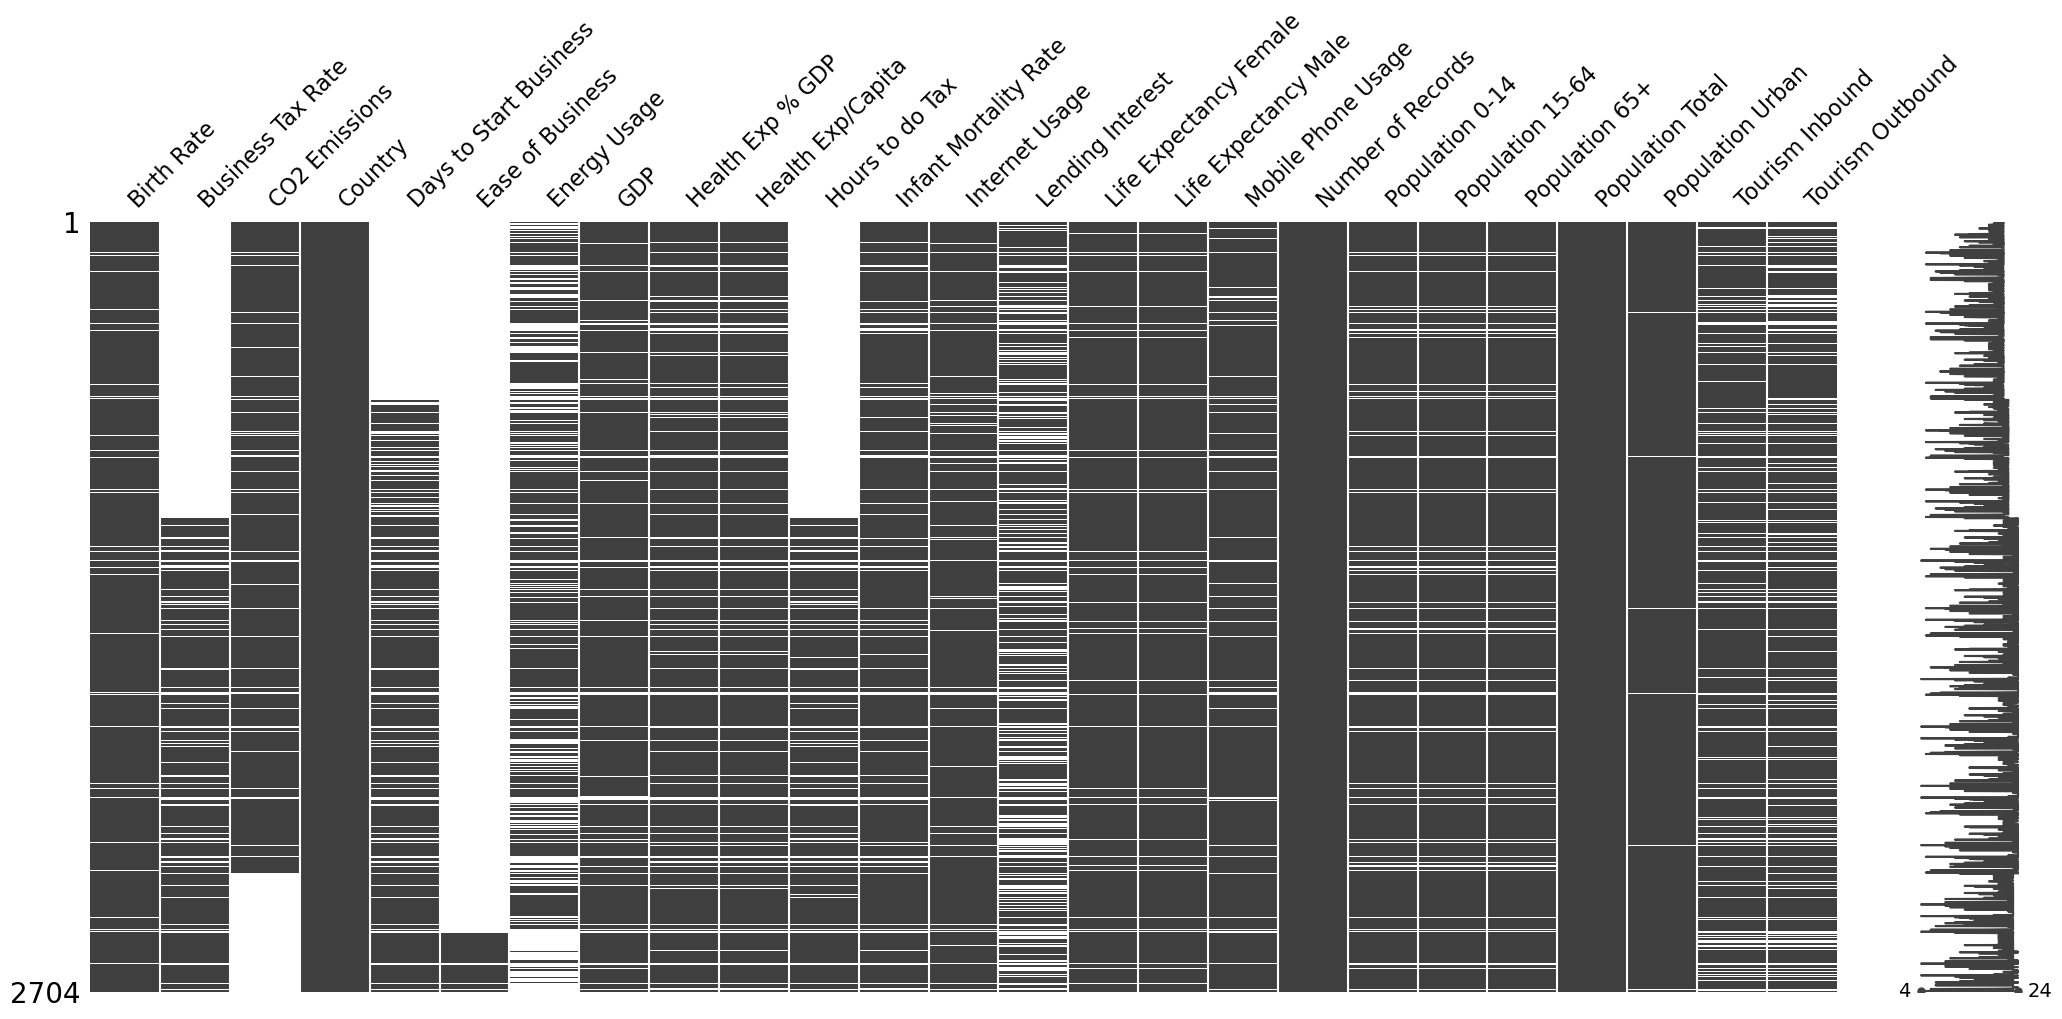

In [11]:
import missingno as msno
msno.matrix(df)
plt.show()

# Feature selection

In [12]:
# 40% data is missing
drop_col = df.columns[df.isnull().sum()/len(df)>0.30]
drop_col

Index(['Business Tax Rate', 'Days to Start Business', 'Ease of Business',
       'Energy Usage', 'Hours to do Tax', 'Lending Interest'],
      dtype='object')

In [13]:
df.drop(columns=['Business Tax Rate', 'Days to Start Business', 'Ease of Business','Energy Usage',
                   'Lending Interest','Hours to do Tax'], inplace=True)
print(df.shape)

(2704, 19)


In [14]:
# unique values in each column of the dataframe
df.nunique(axis=0)

Birth Rate                  47
CO2 Emissions             1743
Country                    208
GDP                       2494
Health Exp % GDP           145
Health Exp/Capita         1069
Infant Mortality Rate      129
Internet Usage              11
Life Expectancy Female      49
Life Expectancy Male        47
Mobile Phone Usage          26
Number of Records            1
Population 0-14            376
Population 15-64           298
Population 65+             208
Population Total          2699
Population Urban           822
Tourism Inbound           1650
Tourism Outbound          1457
dtype: int64

In [15]:
df.drop(columns=["Number of Records"], inplace=True)
print(df.shape)

(2704, 18)


In [16]:
#droping countries with more than 12 columns having only null values
for country in ['Turks and Caicos Islands','St. Martin (French part)','Sint Maarten (Dutch part)','American Samoa']:
    df = df.drop(df.loc[df['Country']==country].index).reset_index(drop=True)
    


# Handling missing values

In [17]:
# imputation using KNN imputer
X = df.drop(columns = ['Country'])
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(X)
Xtrans = imputer.transform(X)
df_KNN = pd.DataFrame(Xtrans, columns =[col for col in df.columns
                                       if df[col].dtypes in ['int64', 'float64']])
df_KNN

Birth Rate  CO2 Emissions           GDP  Health Exp % GDP  \
0          0.020        87931.0  5.479006e+10            0.0350   
1          0.050         9542.0  9.129595e+09            0.0340   
2          0.043         1617.0  2.359122e+09            0.0430   
3          0.027         4276.0  5.788312e+09            0.0470   
4          0.046         1041.0  2.610959e+09            0.0510   
...          ...            ...           ...               ...   
2647       0.015          864.0  2.343634e+10            0.0540   
2648       0.013        47726.2  1.624460e+13            0.1790   
2649       0.015          584.4  5.000435e+10            0.0890   
2650       0.020        77175.8  3.812862e+11            0.0460   
2651       0.011          135.6  5.120915e+08            0.0844   

      Health Exp/Capita  Infant Mortality Rate  Internet Usage  \
0                  60.0                 0.0340             0.0   
1                  22.0                 0.1280             0.0   
2                  15.0                 0.0900             0.0   
3                 152.0                 0.0540             0.0   
4                  12.0                 0.0960             0.0   
...                 ...                    ...             ...   
2647              972.0                 0.0200             0.6   
2648             8895.0                 0.0060             0.8   
2649             1308.0                 0.0100             0.5   
2650              593.0                 0.0130             0.5   
2651              354.8                 0.0208             0.4   

      Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
0                       71.0                  67.0                0.00   
1                       47.0                  44.0                0.00   
2                       57.0                  53.0                0.00   
3                       52.0                  49.0                0.10   
4                       52.0                  49.0                0.00   
...                      ...                   ...                 ...   
2647                    74.0                  66.0                1.40   
2648                    81.0                  76.0                1.00   
2649                    80.0                  74.0                1.50   
2650                    78.0                  72.0                1.00   
2651                    83.0                  76.0                0.68   

      Population 0-14  Population 15-64  Population 65+  Population Total  \
0               0.342             0.619           0.039        31719449.0   
1               0.476             0.499           0.025        13924930.0   
2               0.454             0.517           0.029         6949366.0   
3               0.383             0.587           0.029         1755375.0   
4               0.468             0.505           0.028        11607944.0   
...               ...               ...             ...               ...   
2647            0.207             0.705           0.088         1337439.0   
2648            0.196             0.667           0.136       313873685.0   
2649            0.220             0.639           0.140         3395253.0   
2650            0.288             0.652           0.060        29954782.0   
2651            0.206             0.641           0.152          105275.0   

      Population Urban  Tourism Inbound  Tourism Outbound  
0                0.599     1.020000e+08      1.930000e+08  
1                0.324     3.400000e+07      1.460000e+08  
2                0.383     7.700000e+07      5.000000e+07  
3                0.532     2.270000e+08      2.090000e+08  
4                0.178     2.300000e+07      3.000000e+07  
...                ...              ...               ...  
2647             0.088     4.576000e+08      1.608000e+08  
2648             0.811     2.000920e+11      1.265730e+11  
2649             0.948     2.222000e+09      1.028000e

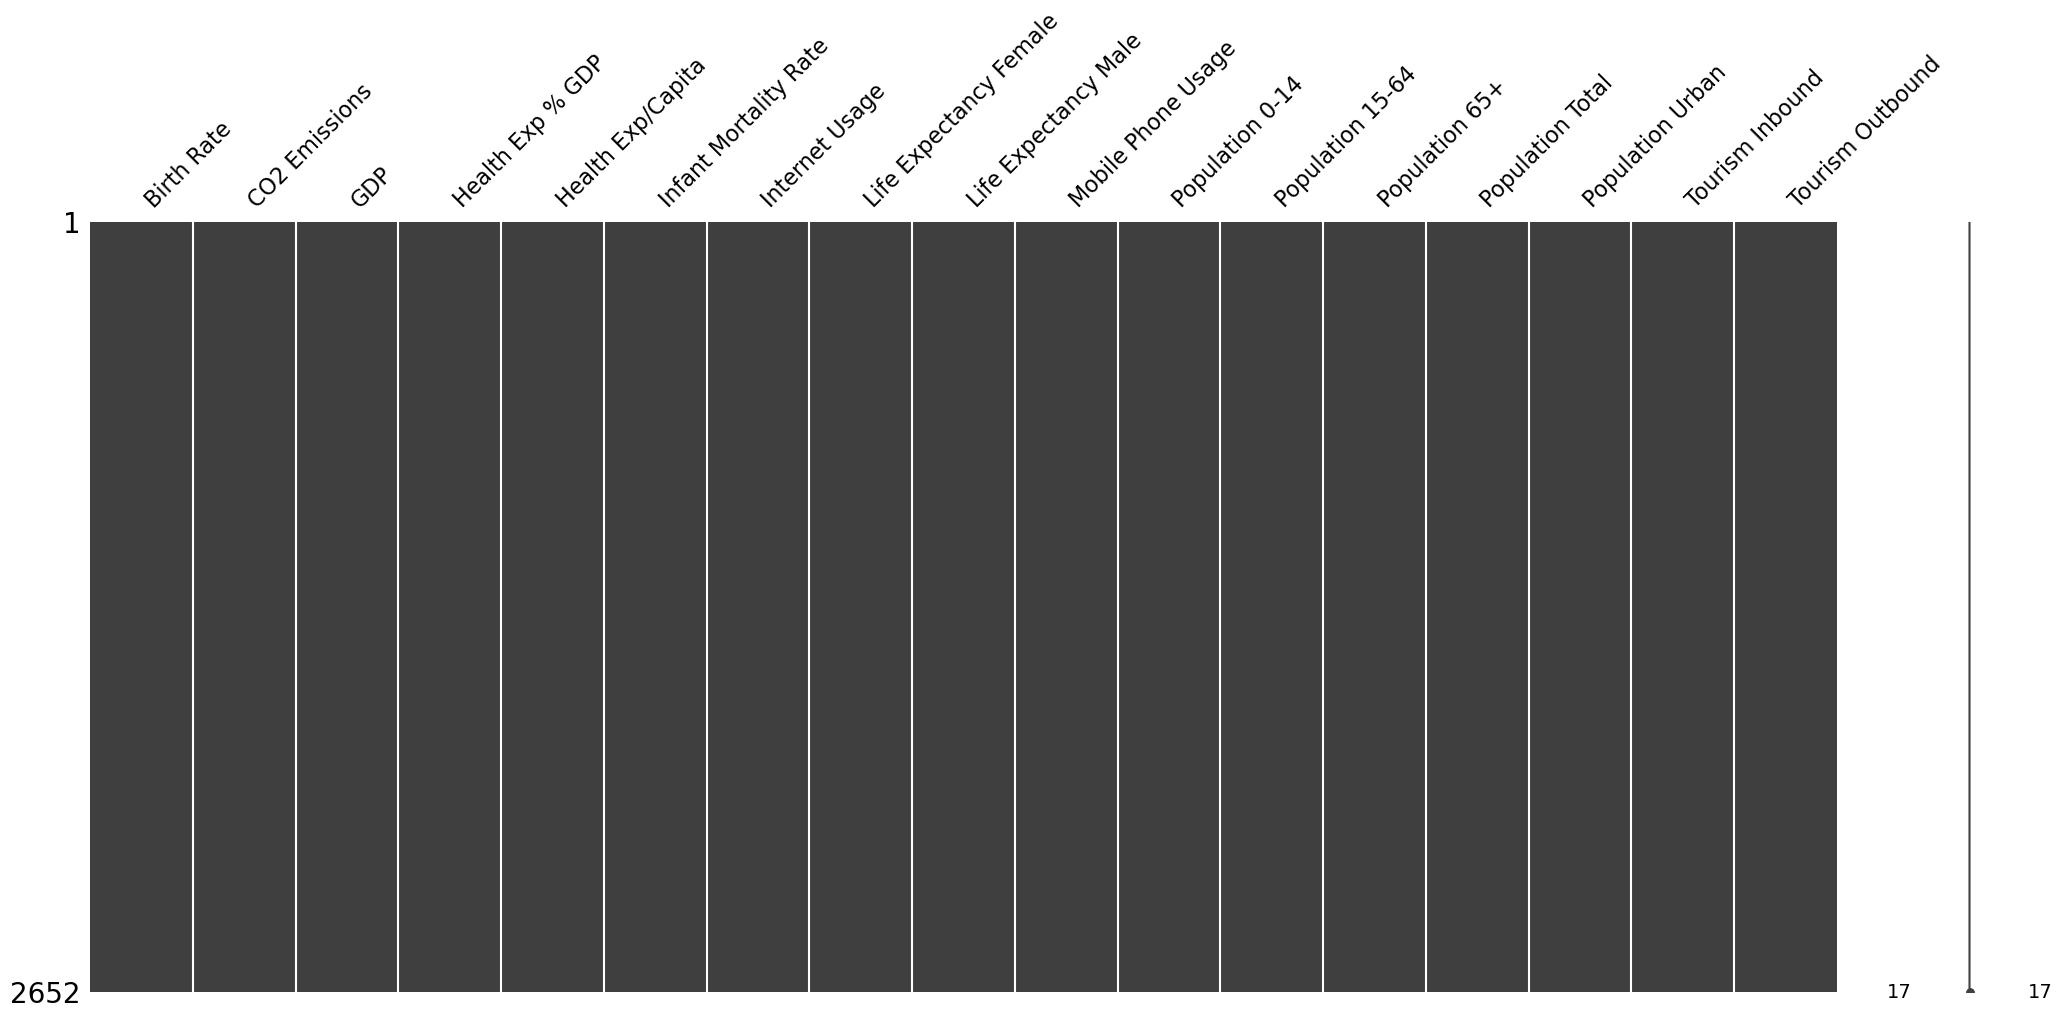

In [18]:
import missingno as msno
msno.matrix(df_KNN)
plt.show()

In [19]:
# since total population is just sum of population in different age categories we dopped total population
df_KNN.drop(columns=['Population 0-14','Population 15-64','Population 65+'], inplace=True)
print(df_KNN.shape)

(2652, 14)


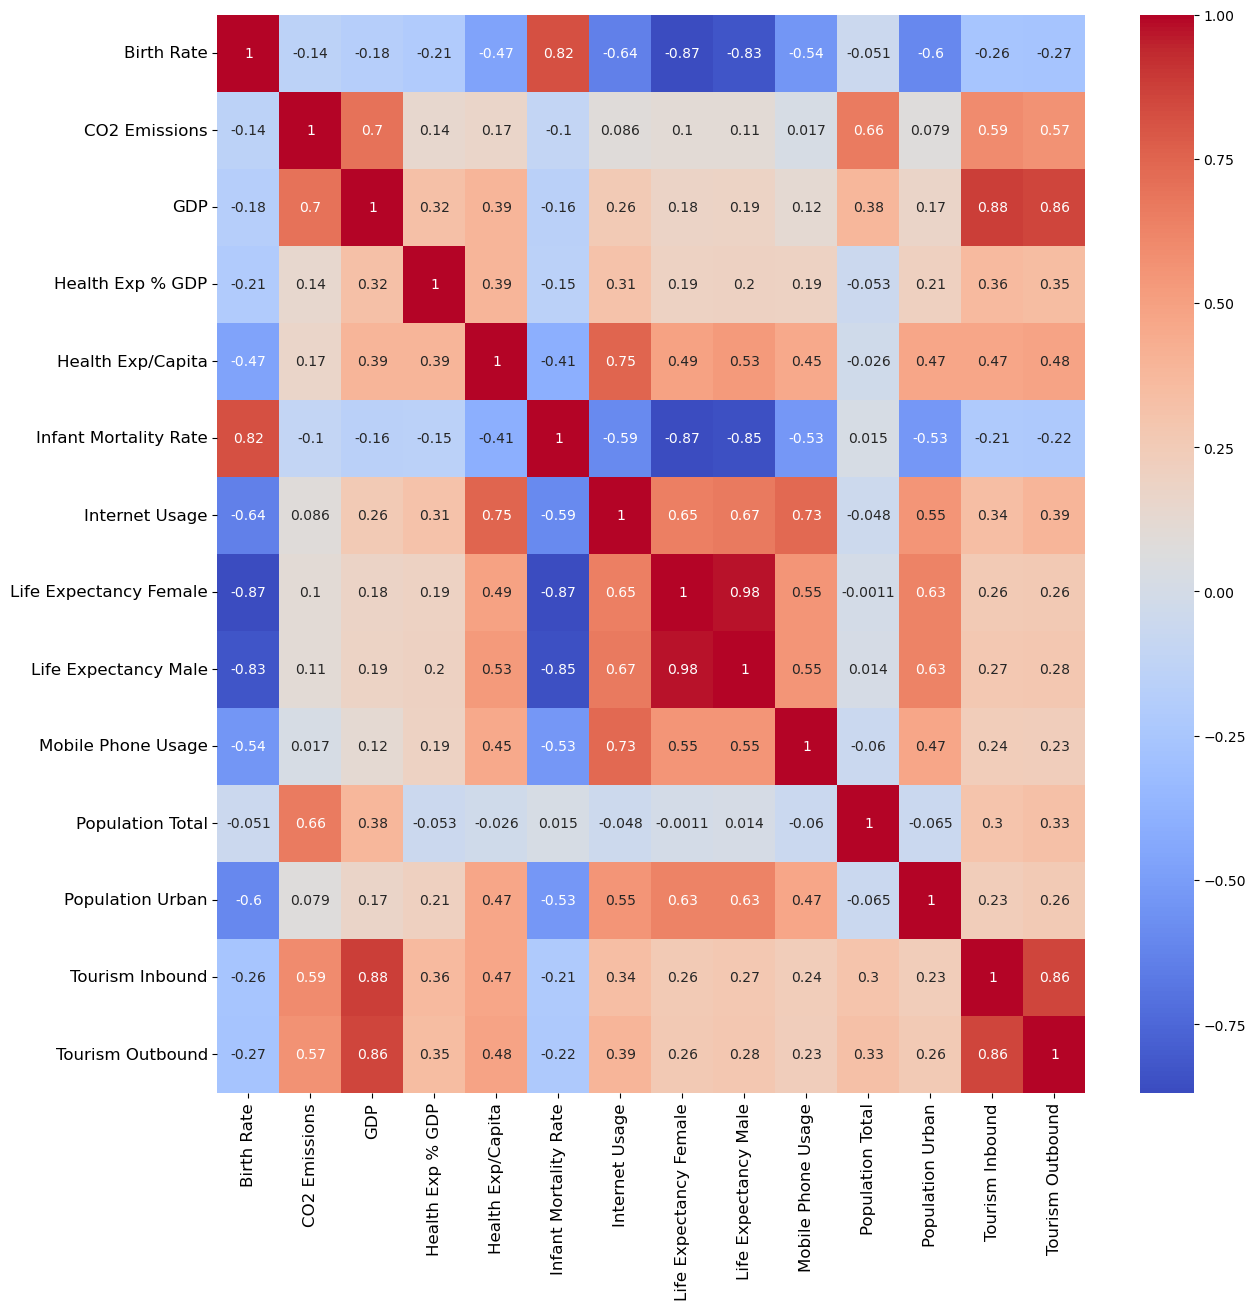

In [20]:
#correlation among the different columns
plt.figure(figsize = (14,14))
sns.heatmap(df_KNN.corr(), annot=True, cmap='coolwarm')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

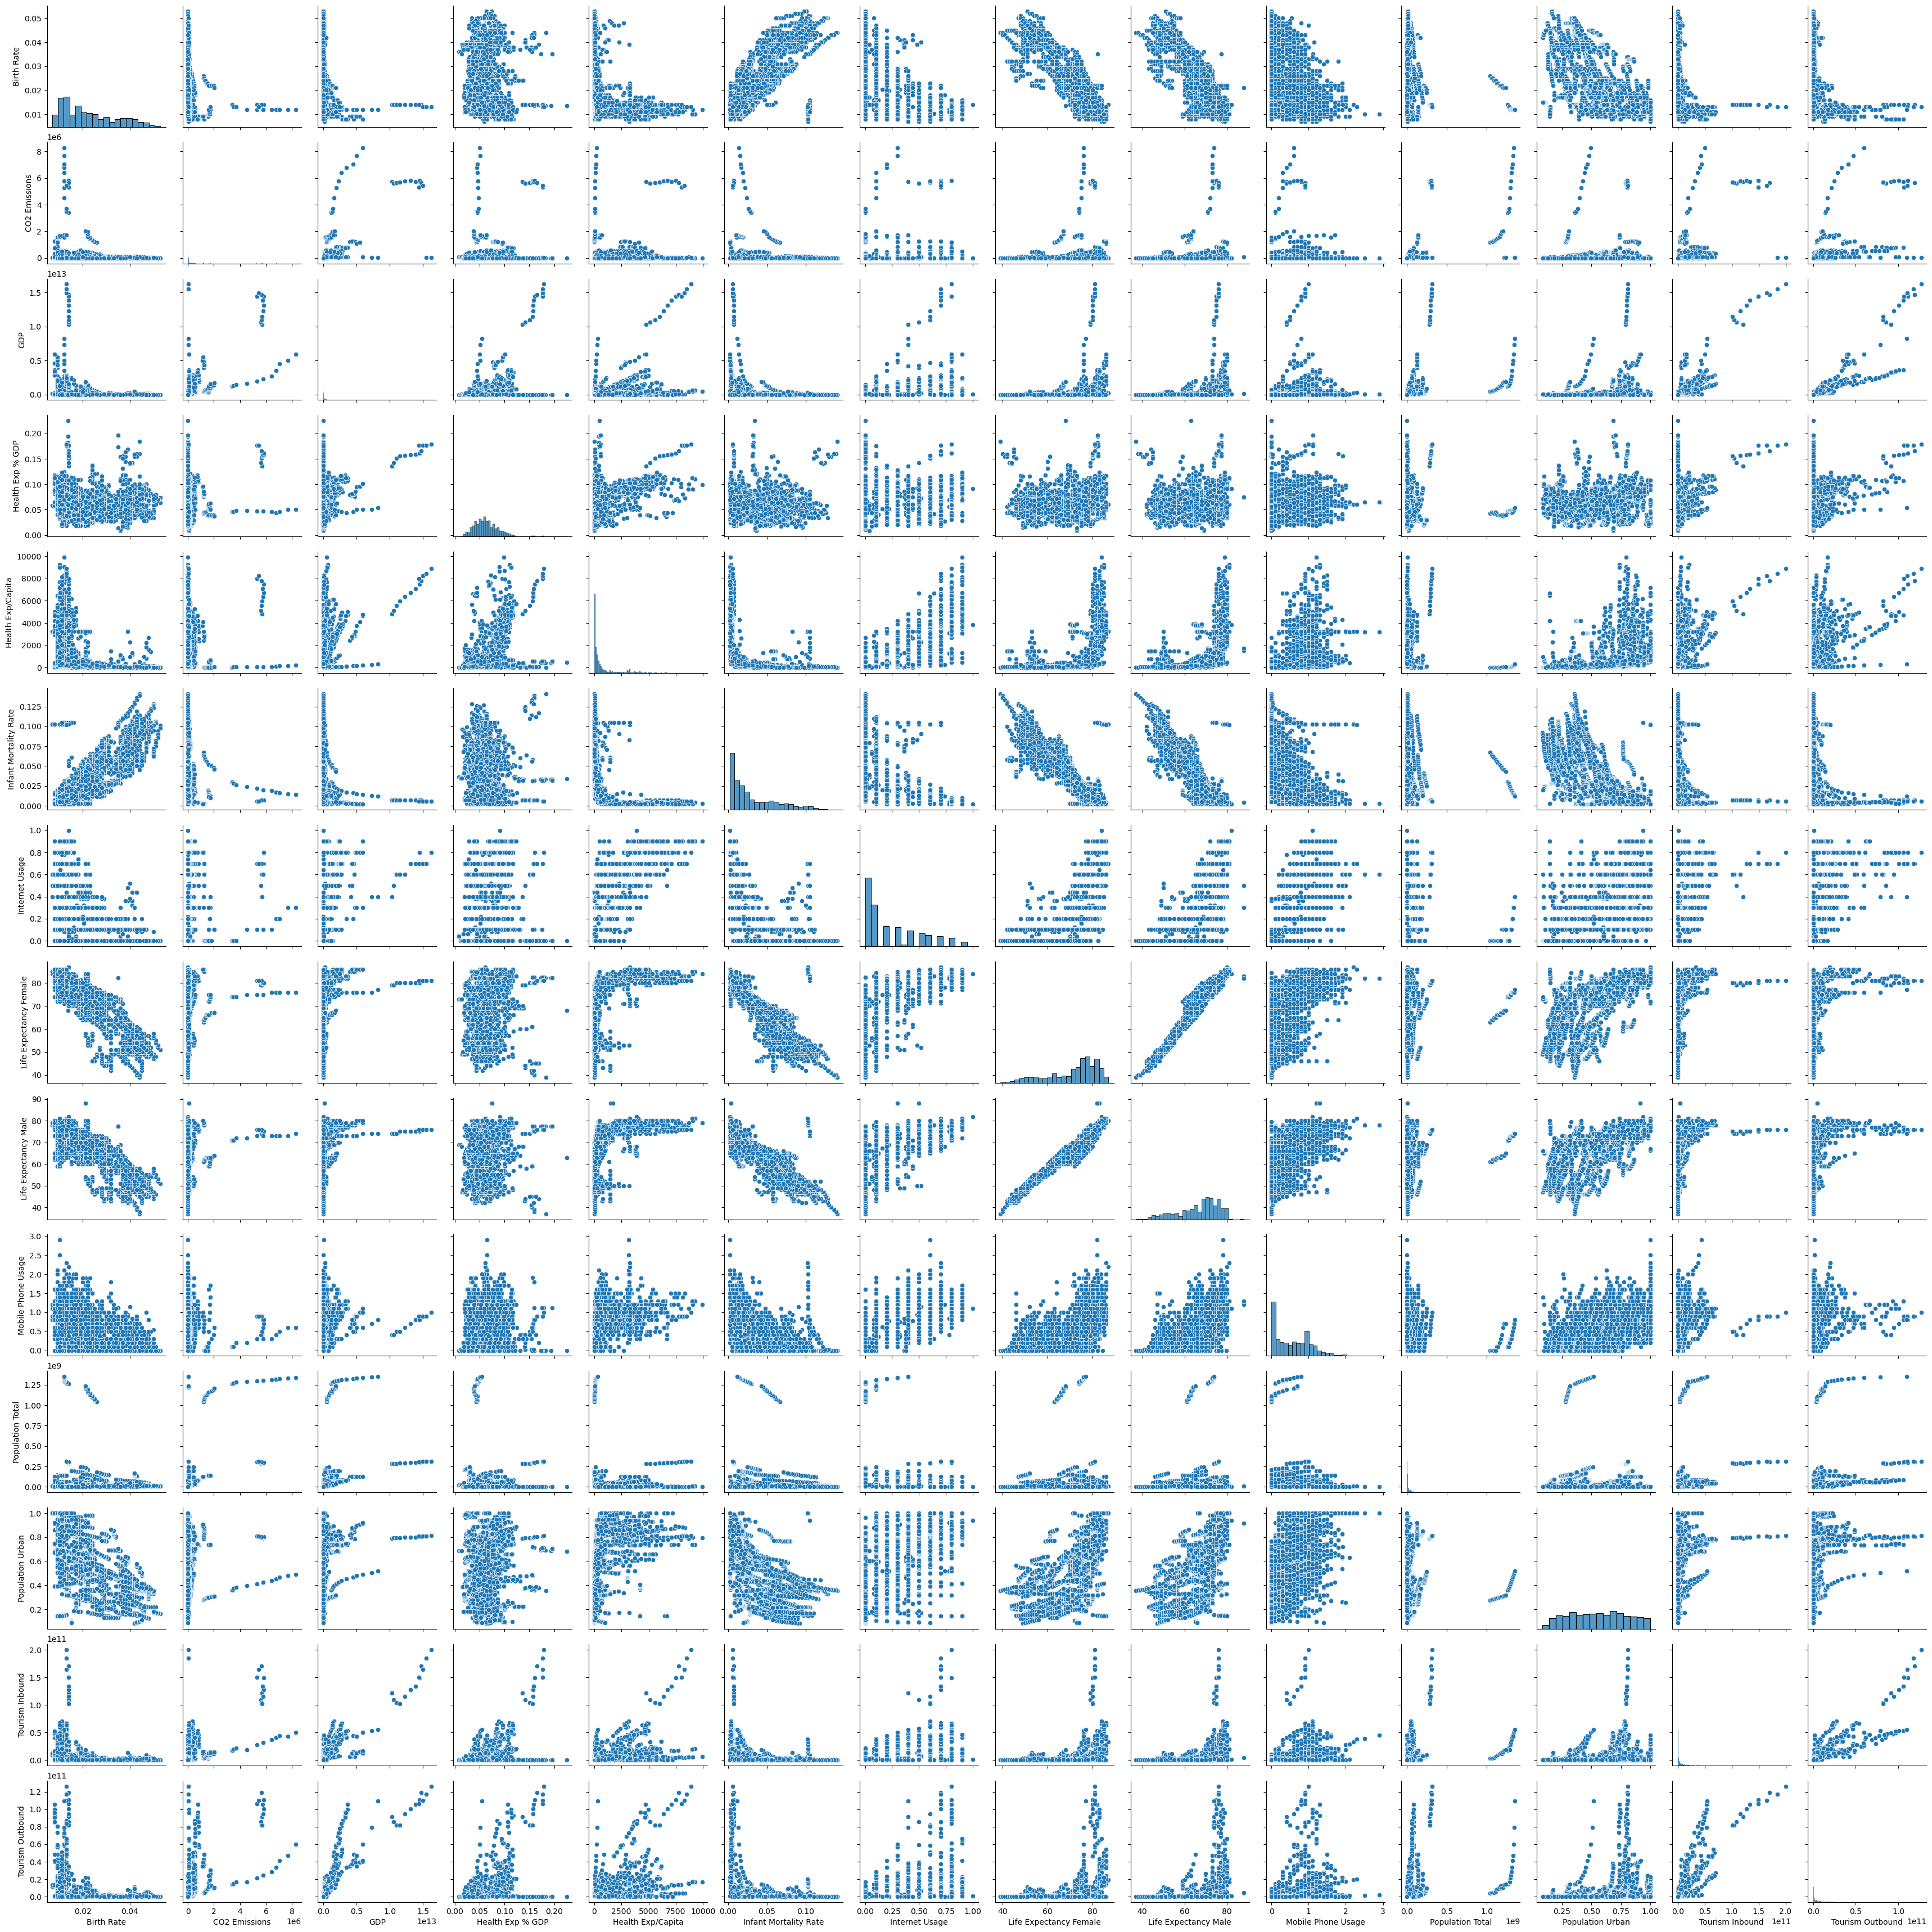

In [21]:
sns.pairplot(df_KNN)
plt.show()

**columns showing strong linear coorelation are Life Expectancy for male and female**

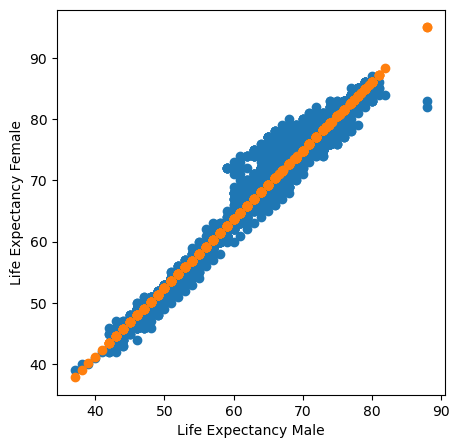

In [22]:
# replacing the male female life expectancy with one colume given by the linear regression between the two
from sklearn.linear_model import HuberRegressor
x_ex = df_KNN[["Life Expectancy Male"]]
y_ex = df_KNN[["Life Expectancy Female"]]
model = HuberRegressor()
model.fit(x_ex, y_ex)
y_hat = model.predict(x_ex)
y_hat

plt.figure(figsize = (5,5))
plt.scatter(x="Life Expectancy Male", y ="Life Expectancy Female" , data = df_KNN)
plt.scatter(x= x_ex, y = y_hat)
plt.xlabel("Life Expectancy Male")
plt.ylabel("Life Expectancy Female")
plt.show()

In [23]:
df_KNN["life_expectancy"] = y_hat
df_KNN.drop(columns=["Life Expectancy Male","Life Expectancy Female"], inplace=True)

In [24]:
print(df_KNN.shape)
df_KNN.head()

(2652, 13)


Birth Rate  CO2 Emissions           GDP  Health Exp % GDP  \
0       0.020        87931.0  5.479006e+10             0.035   
1       0.050         9542.0  9.129595e+09             0.034   
2       0.043         1617.0  2.359122e+09             0.043   
3       0.027         4276.0  5.788312e+09             0.047   
4       0.046         1041.0  2.610959e+09             0.051   

   Health Exp/Capita  Infant Mortality Rate  Internet Usage  \
0               60.0                  0.034             0.0   
1               22.0                  0.128             0.0   
2               15.0                  0.090             0.0   
3              152.0                  0.054             0.0   
4               12.0                  0.096             0.0   

   Mobile Phone Usage  Population Total  Population Urban  Tourism Inbound  \
0                 0.0        31719449.0             0.599      102000000.0   
1                 0.0        13924930.0             0.324       34000000.0   
2                 0.0         6949366.0             0.383       77000000.0   
3                 0.1         1755375.0             0.532      227000000.0   
4                 0.0        11607944.0             0.178       23000000.0   

   Tourism Outbound  life_expectancy  
0       193000000.0        71.475904  
1       146000000.0        45.732821  
2        50000000.0        55.806202  
3       209000000.0        51.329144  
4        30000000.0        51.329144

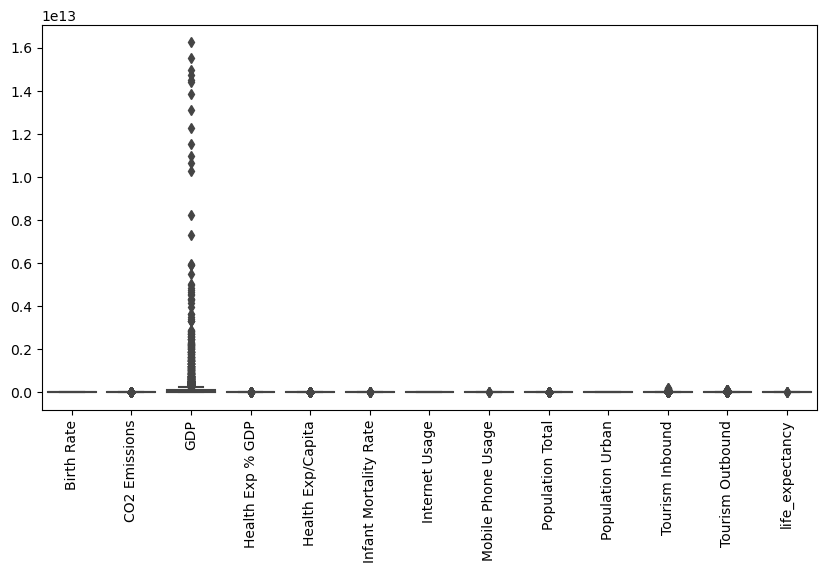

In [25]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_KNN)
plt.xticks(rotation = 90)
plt.show()

In [26]:
# perform a robust scaler transform of the dataset
from sklearn.preprocessing import RobustScaler
trans = RobustScaler()
df_norm = pd.DataFrame(trans.fit_transform(df_KNN), columns = df_KNN.columns)
df_norm

Birth Rate  CO2 Emissions         GDP  Health Exp % GDP  \
0       0.000000       1.511395    0.427055         -0.828025   
1       1.764706       0.073422   -0.047439         -0.859873   
2       1.352941      -0.071955   -0.117796         -0.573248   
3       0.411765      -0.023178   -0.082161         -0.445860   
4       1.529412      -0.082521   -0.115179         -0.318471   
...          ...            ...         ...               ...   
2647   -0.294118      -0.085768    0.101234         -0.222930   
2648   -0.411765       0.773875  168.668262          3.757962   
2649   -0.294118      -0.090897    0.377323          0.891720   
2650    0.000000       1.314101    3.819937         -0.477707   
2651   -0.529412      -0.099129   -0.136990          0.745223   

      Health Exp/Capita  Infant Mortality Rate  Internet Usage  \
0             -0.221324               0.318182           -0.25   
1             -0.268573               2.454545           -0.25   
2             -0.277277               1.590909           -0.25   
3             -0.106932               0.772727           -0.25   
4             -0.281007               1.727273           -0.25   
...                 ...                    ...             ...   
2647           0.912652               0.000000            1.25   
2648          10.764066              -0.318182            1.75   
2649           1.330432              -0.227273            1.00   
2650           0.441405              -0.159091            1.00   
2651           0.145228               0.018182            0.75   

      Mobile Phone Usage  Population Total  Population Urban  Tourism Inbound  \
0                 -0.625          1.325048          0.105066        -0.183789   
1                 -0.625          0.404841         -0.582864        -0.207193   
2                 -0.625          0.044113         -0.435272        -0.192394   
3                 -0.500         -0.224484         -0.062539        -0.140768   
4                 -0.625          0.285022         -0.948093        -0.210979   
...                  ...               ...               ...              ...   
2647               1.125         -0.246096         -1.173233        -0.061401   
2648               0.625         15.916089          0.635397        68.647737   
2649               1.250         -0.139681          0.978111         0.545861   
2650               0.625          1.233792          0.830519         0.092239   
2651               0.225         -0.309815          0.980613        -0.192256   

      Tourism Outbound  life_expectancy  
0            -0.089195        -0.153846  
1            -0.115644        -1.923077  
2            -0.169668        -1.230769  
3            -0.080191        -1.538462  
4            -0.180923        -1.538462  
...                ...              ...  
2647         -0.107316        -0.230769  
2648         71.030670         0.538462  
2649          0.380698         0.384615  
2650          1.604108         0.230769  
2651         -0.192853         0.538462  

[2652 rows x 13 columns]

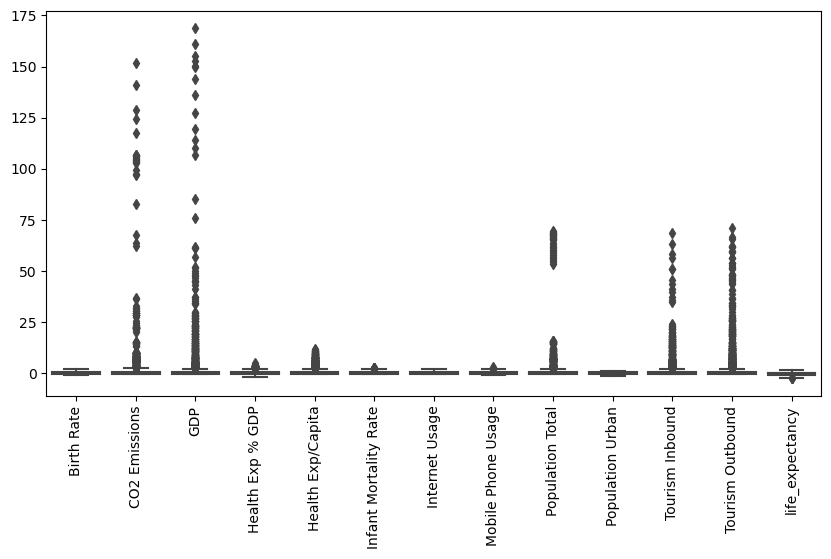

In [27]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_norm)
plt.xticks(rotation = 90)
plt.show()

# Dimension reduction

# Dimension reduction using PCA

In [28]:
from sklearn.decomposition import PCA
pc = PCA()
pc_components = pc.fit_transform(df_norm)
cum_var = np.cumsum(np.round(pc.explained_variance_ratio_,decimals=4)*100)
cum_var = pd.DataFrame(cum_var, columns= ['cum_var'])

In [29]:
import plotly.express as px

fig = px.line(cum_var, x=cum_var.index, y=cum_var['cum_var'] , markers=True, width=800, height=300)
fig.update_layout(
    margin=dict(l=5, r=50, t=5, b=5),
    paper_bgcolor="LightSteelBlue")
fig.show()

**97.55% of the data is included in just three components**

In [30]:
df_pc = pd.DataFrame(pc_components)
df_pc = df_pc.iloc[:,:3]
df_pc.columns = ['pc1', 'pc2','pc3']
df_pc.head()

pc1       pc2       pc3
0 -2.887036 -1.690230 -0.431259
1 -4.274084 -0.621051 -0.363730
2 -4.480561 -0.341271 -0.586065
3 -4.424034 -0.123111 -0.800903
4 -4.442399 -0.485323 -0.397073

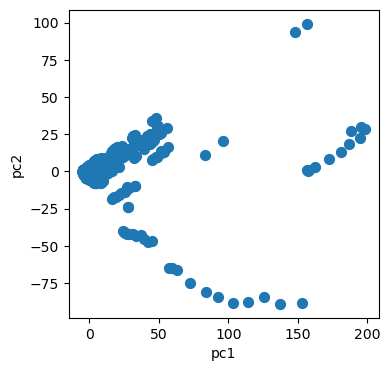

In [31]:
plt.figure(figsize = (4,4))
plt.scatter(df_pc.pc1, df_pc.pc2, s=50)
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.show()

# Hierarchical Clustering

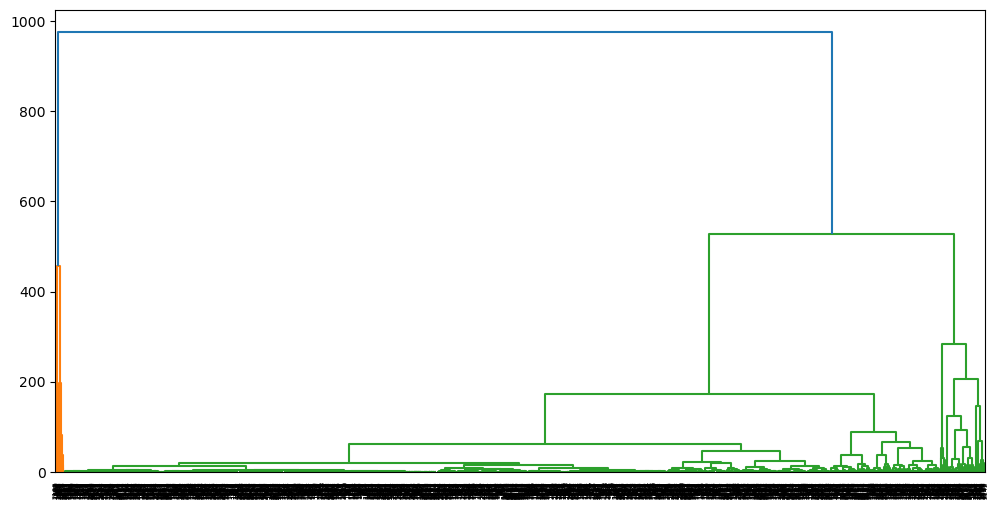

In [32]:
import scipy.cluster.hierarchy as sch 

from numpy import unique
# create dendrogram
plt.figure(figsize = (12,6))
dendrogram = sch.dendrogram(sch.linkage(df_pc, method='ward'))
plt.xticks(rotation = 90)
plt.show()

# AgglomerativeClustering

In [33]:
# create clusters
from sklearn.cluster import AgglomerativeClustering
for n in range(2,10):
    hc = AgglomerativeClustering(n_clusters=n, affinity = 'euclidean', linkage = 'ward')
    hc.fit(df_pc)
    y_hc = hc.fit_predict(df_pc)
    s_hc = silhouette_score(df_pc, y_hc)
    print(n, s_hc)

2 0.9499546706006899
3 0.8692555326353271
4 0.8723683118581921
5 0.8724062399854688
6 0.850254820552338
7 0.8510092095535552
8 0.7055848149896555
9 0.7061235402825259


In [34]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
hc.fit(df_pc)
y_hc = hc.fit_predict(df_pc)
s_hc = silhouette_score(df_pc, y_hc)
print('Silhouette Score :', s_hc)

Silhouette Score : 0.8724062399854688


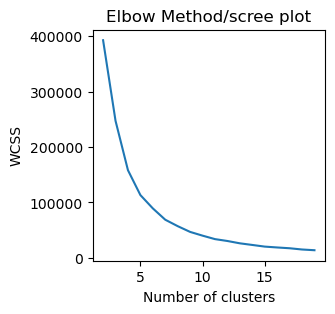

In [35]:
from sklearn.cluster import KMeans
wcss = [] #within cluster sum of squares
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_pc)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize = (3,3))
plt.plot(range(2, 20), wcss)
plt.title('Elbow Method/scree plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
for n in range(2,10):
    kmeans = KMeans(n_clusters=n, random_state=0)
    y_Kmeans=kmeans.fit_predict(df_pc)
    s_kmeans = silhouette_score(df_pc, y_Kmeans)
    print(n, s_kmeans)

2 0.9513898512880448
3 0.8809971551895612
4 0.880416432757487
5 0.8762339650907707
6 0.7817395960281983
7 0.7821232452871694
8 0.7692354140102964
9 0.7177295431799813


In [37]:
# using scree plot we choose K = 5 for KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
y_Kmeans=kmeans.fit_predict(df_pc)
s_kmeans = silhouette_score(df_pc, y_Kmeans)
print("silhouette_score :", s_kmeans)

silhouette_score : 0.8762339650907707


In [38]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3, min_samples=10)
y_dbscan = dbscan.fit_predict(df_pc)
s_dbscan = silhouette_score(df_pc, y_dbscan)
print("silhouette_score: ", s_dbscan)

silhouette_score:  0.7747617174868021


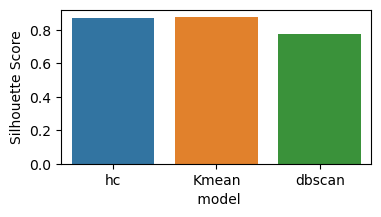

In [39]:
s_score = [s_hc,s_kmeans,s_dbscan ]
mod = ['hc', 'Kmean','dbscan']
plt.figure(figsize= (4,2))
sns.barplot(x= mod, y =s_score)
plt.xlabel(" model")
plt.ylabel("Silhouette Score")
plt.show()

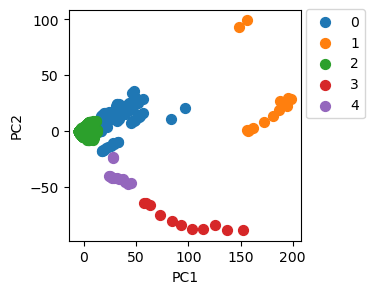

In [40]:
#cluster plotting
df_pc['hc'] = y_hc
df_pc['KMeans'] = y_Kmeans
df_pc['DBSCAN'] = y_dbscan
X = df_pc.iloc[:,:2]
X = np.array(X)
clusters_hc = np.unique(df_pc['hc'])
clusters_KMeans = np.unique(df_pc['KMeans'])
clusters_DBSCAN = np.unique(df_pc['DBSCAN'])
# create scatter plot for samples from each cluster
plt.figure(figsize = (3,3))
for cluster in clusters_hc:
    row_ix = np.where(df_pc['hc'] == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1],s=50,label = cluster)   

plt.legend(loc = (1.02,0.53))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show() 

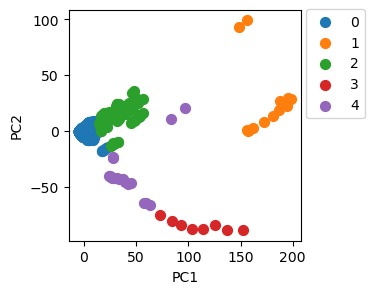

In [41]:
yhat = df_pc['KMeans']
plt.figure(figsize = (3,3))
for cluster in clusters_KMeans:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], s=50, label = cluster)
plt.legend(loc = (1.02,0.53))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

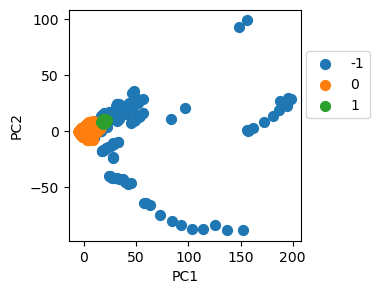

In [42]:
yhat = df_pc['DBSCAN']
plt.figure(figsize = (3,3))
for cluster in clusters_DBSCAN:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], s=50, label = cluster)
plt.legend(loc = (1.02,0.53))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

**we finalized agglomerative clustering as the best one for the given dataset with 5 as number of clusters and 0.87 as Silhoutte Score**


In [43]:
df_final = df_norm
df_final['clusters'] = df_pc['hc']
df_final.head()

Birth Rate  CO2 Emissions       GDP  Health Exp % GDP  Health Exp/Capita  \
0    0.000000       1.511395  0.427055         -0.828025          -0.221324   
1    1.764706       0.073422 -0.047439         -0.859873          -0.268573   
2    1.352941      -0.071955 -0.117796         -0.573248          -0.277277   
3    0.411765      -0.023178 -0.082161         -0.445860          -0.106932   
4    1.529412      -0.082521 -0.115179         -0.318471          -0.281007   

   Infant Mortality Rate  Internet Usage  Mobile Phone Usage  \
0               0.318182           -0.25              -0.625   
1               2.454545           -0.25              -0.625   
2               1.590909           -0.25              -0.625   
3               0.772727           -0.25              -0.500   
4               1.727273           -0.25              -0.625   

   Population Total  Population Urban  Tourism Inbound  Tourism Outbound  \
0          1.325048          0.105066        -0.183789         -0.089195   
1          0.404841         -0.582864        -0.207193         -0.115644   
2          0.044113         -0.435272        -0.192394         -0.169668   
3         -0.224484         -0.062539        -0.140768         -0.080191   
4          0.285022         -0.948093        -0.210979         -0.180923   

   life_expectancy  clusters  
0        -0.153846         2  
1        -1.923077         2  
2        -1.230769         2  
3        -1.538462         2  
4        -1.538462         2

In [44]:
df_final.columns

Index(['Birth Rate', 'CO2 Emissions', 'GDP', 'Health Exp % GDP',
       'Health Exp/Capita', 'Infant Mortality Rate', 'Internet Usage',
       'Mobile Phone Usage', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound', 'life_expectancy', 'clusters'],
      dtype='object')

# multiclass Classification on df_final

In [45]:
df_final.clusters.value_counts()


2    2500
0     115
4      13
1      13
3      11
Name: clusters, dtype: int64

In [46]:
#saving the final data frame that was used for classification with country column included for Tableau
df_final.to_csv('clusters.csv',index=False)

Class=2, n=2500 (94.268%)
Class=3, n=11 (0.415%)
Class=4, n=13 (0.490%)
Class=0, n=115 (4.336%)
Class=1, n=13 (0.490%)


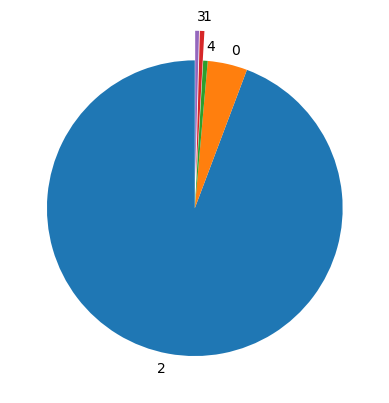

In [47]:
from collections import Counter
counter = Counter(df_final.clusters)
for k,v in counter.items():
    per = v / len(df_final.clusters) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
#pie plot showing distribution of the target varibale
mylabels = [2,0,4,1,3]
myexplode = [0, 0, 0, 0.2, 0.2]
plt.pie(df_final.clusters.value_counts(), 
        labels = mylabels,explode = myexplode, shadow = False, startangle = 90)
plt.show()

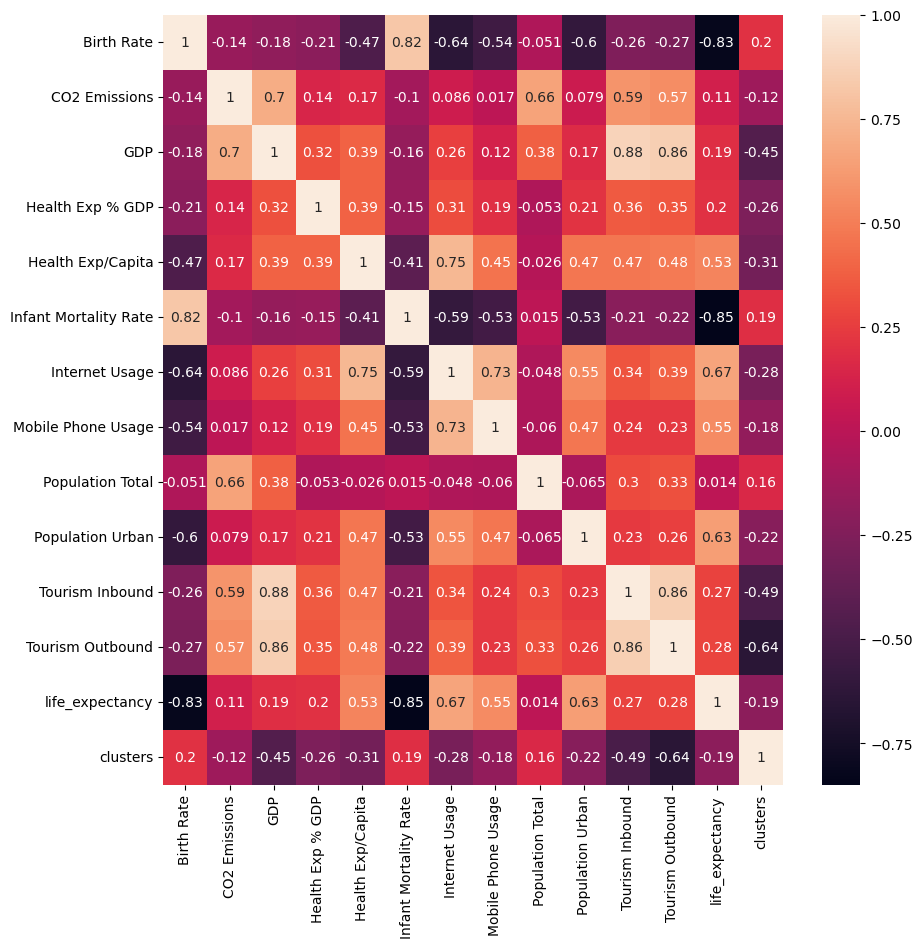

In [48]:
plt.figure(figsize = (10,10))
sns.heatmap(df_final.corr(), annot = True)
plt.show()

In [49]:
#import libraries for classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [50]:
X = df_final.iloc[:,:-1]
Y=df_final[['clusters']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,stratify=Y, random_state=42)


training accuracy : 0.9983108108108109
test accuracy   : 0.997
f1_score: 0.9914182841534578
recall_score:  [0.92105263 1.         1.         1.         1.        ]


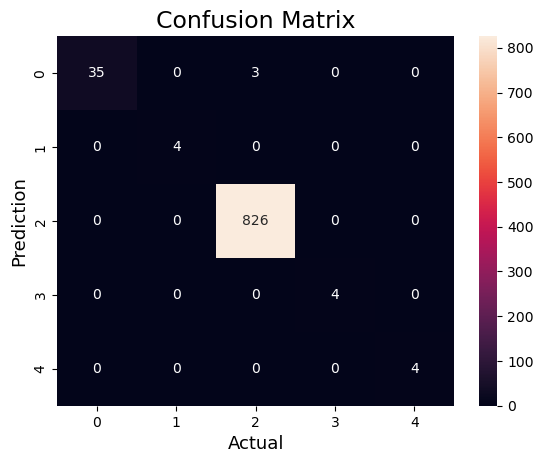

In [51]:
#logistic regresstion
model_lr = LogisticRegression(solver='lbfgs', random_state = 42, multi_class = 'ovr')
model_lr.fit(x_train.values,y_train.values)
y_pred = model_lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred, average=None)
f1_lr = f1_score(y_test, y_pred, average= 'macro')
print('training accuracy :', model_lr.score(x_train, y_train))
print("test accuracy   :", round(accuracy_lr, 3))
print("f1_score:", f1_lr)
print('recall_score: ', recall_lr)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [52]:
np.array(y_train).shape

(1776, 1)

training accuracy : 1.0
f1_score: 0.9916370235934664
test accuracy   : 0.997
recall_score:  [0.94736842 1.         0.99878935 1.         1.        ]


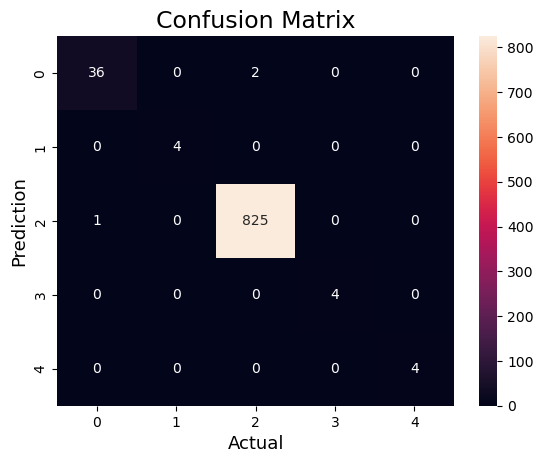

In [53]:
#SVM
model_svm = SVC(kernel='linear',gamma='auto',
                   decision_function_shape='ovo', random_state=42)
model_svm.fit(np.array(x_train),np.array(y_train))
y_pred = model_svm.predict(np.array(x_test))
accuracy_svm = accuracy_score(y_test, y_pred)
recall_svm = recall_score(y_test, y_pred, average=None)
f1_svm = f1_score(y_test, y_pred, average= 'macro')
print('training accuracy :', model_svm.score(x_train, y_train))
print("f1_score:", f1_svm)
print("test accuracy   :", round(accuracy_svm, 3))
print('recall_score: ', recall_svm)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

training accuracy : 1.0
f1_score: 0.9943527566260336
test accuracy   : 0.998
recall_score:  [0.94736842 1.         1.         1.         1.        ]


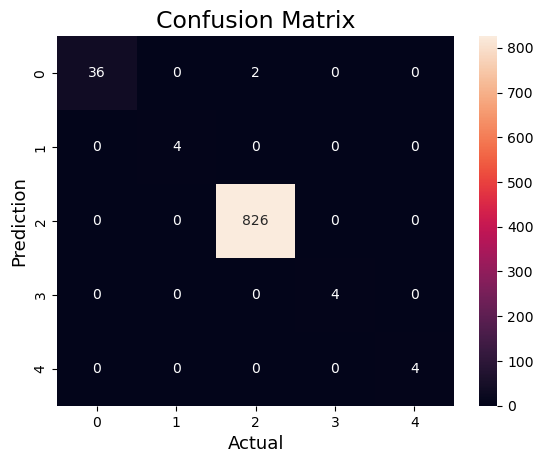

In [54]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred, average=None)
f1_knn = f1_score(y_test, y_pred, average= 'macro')
print('training accuracy :', knn.score(x_train, y_train))
print("f1_score:", f1_knn)
print("test accuracy   :", round(accuracy_knn, 3))
print('recall_score: ', recall_knn)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

training accuracy : 0.9887387387387387
test accuracy   : 0.987
f1_score:  0.7107478562900249
recall_score:  [0.86842105 1.         1.         0.5        0.        ]


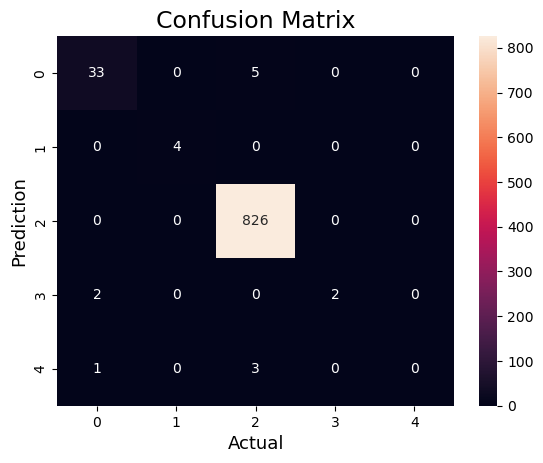

In [55]:
model_rf = RandomForestClassifier(n_estimators=50,random_state=42, max_samples = 200,max_depth =5,max_features = None)
model_rf.fit(x_train,y_train)
y_pred = model_rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred, average=None)
f1_rf = f1_score(y_test, y_pred, average= 'macro')
print('training accuracy :', model_rf.score(x_train, y_train))
print("test accuracy   :", round(accuracy_rf, 3))
print("f1_score: ",f1_rf)
print('recall_score: ', recall_rf)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


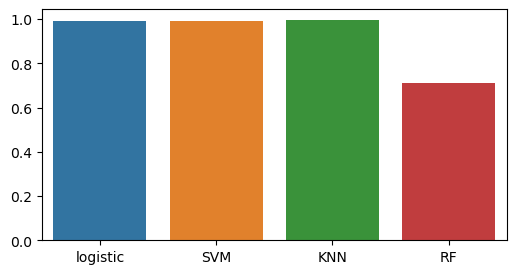

In [56]:
f_score = [f1_lr, f1_svm, f1_knn, f1_rf]
model = ['logistic','SVM','KNN','RF']
plt.figure(figsize = (6,3))
sns.barplot(x = model, y = f_score)
plt.show()


# Conclusion
**SVM train accuracy 100%, test accuracy 99.7% and f1-score 99.1**

#saving the final data frame that was used for classification with country column included for Tableau use
final = df_final
final['country'] = df['Country']
final.to_csv('clusters.csv')

In [58]:
import pickle
pickle.dump(model_svm, open('deployment\models\model.pkl','wb'))
model = pickle.load(open('deployment\models\model.pkl','rb'))
